# Implement Linear Regression with gradient descent and compare it with Linear Regression using Scikit-learn module

## Linear Regression from Scratch

In [1]:
# inport required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Source:** https://www.kaggle.com/datasets/mirichoi0218/insurance/data

In [2]:
# read data

df = pd.read_csv('insurance.csv')

In [3]:
# top 5 rows

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# data structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# data summary

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Linear Regression using a Single Feature

In [6]:
# set seed
np.random.seed(1)

# randomly select 1000 row indices for training dataset
train_indices = np.random.choice(df.shape[0], size=1000, replace=False)

# Training dataset
train_df = df.iloc[train_indices]

# remaining test indices
test_indices = np.setdiff1d(np.arange(df.shape[0]), train_indices)

# Test dataset
test_df = df.iloc[test_indices]

print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (1000, 7)
Test shape: (338, 7)


In [7]:
# input feature
input_cols = ['age']

# target feature 
target_col = 'charges'

# train and test dataset inputs and target
X_train, y_train = train_df[input_cols].values, train_df[target_col].values
X_test, y_test = test_df[input_cols].values, test_df[target_col].values

# train data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_train = {X_train[:10]}')
print(f'y_train = {y_train[:10]}') 

# test data
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_test = {X_test[:10]}')
print(f'y_test = {y_test[:10]}') 

X_train shape: (1000, 1)
y_train shape: (1000,)
X_train = [[19]
 [57]
 [51]
 [49]
 [21]
 [31]
 [49]
 [56]
 [27]
 [37]]
y_train = [ 1646.4297  11353.2276   8798.593   10381.4787   2103.08    38746.3551
  9304.7019  11658.11505  3070.8087  19539.243  ]
X_test shape: (338, 1)
y_test shape: (338,)
X_test = [[19]
 [60]
 [30]
 [37]
 [59]
 [62]
 [37]
 [38]
 [58]
 [28]]
y_test = [ 1837.237   13228.84695  4149.736    6203.90175 14001.1338  15612.19335
  6313.759    6079.6715  47496.49445  4133.64165]


#### Feature Scaling

Using Standardization, `Xscaled = (X - mu)/sigma`.

In [8]:
# Apply Standardization

X_train_scaled = (X_train - np.mean(X_train)) / (np.std(X_train))
X_test_scaled = (X_test - np.mean(X_test)) / (np.std(X_test))

In [9]:
# Scaled features

print(f'X_train = {X_train_scaled[:10]}')
print(f'X_train = {X_test_scaled[:10]}')

X_train = [[-1.45403099]
 [ 1.23743852]
 [ 0.81246965]
 [ 0.67081336]
 [-1.3123747 ]
 [-0.60409325]
 [ 0.67081336]
 [ 1.16661038]
 [-0.88740583]
 [-0.17912438]]
X_train = [[-1.39731945]
 [ 1.57810356]
 [-0.59903523]
 [-0.09103618]
 [ 1.50553227]
 [ 1.72324614]
 [-0.09103618]
 [-0.01846489]
 [ 1.43296097]
 [-0.74417781]]


### Modelling

**Implementing Linear Regression with One Variable Using Gradient Descent for cost function optimization**

In [10]:
# Linear Regression function

def linear_regression(X, y, alpha, num_iters):
    """
    Computes the gradient for linear regression 
    Args:
      X (2-d array (m,1)): Data, m examples 
      y (1-d array (m,)): target values
      alpha(scalar): learning rate
      num_iters (int): Number of iterations for gradient descent
    Returns:
      w (scalar): The weight for the input feature
      b (scalar): Bias term    
      costs (list): History of cost values during iterations
      w_history: History of weight values during iterations
     """

    # Number of training examples
    m = X.shape[0]
    
    # Initial parameters
    w = 0
    b = 0

    # List to store weight w
    w_history = []
    
    # Ensure y is a column vector
    y = np.reshape(y, (-1, 1))

    # List to store Cost
    costs = []
    
    for i in range(num_iters):
       
        # Linear Model
        f_wb = np.dot(X, w) + b
        
        # Cost
        cost = np.sum((f_wb - y) ** 2) / (2 * m)
        costs.append(cost)
        
        # Gradient
        dj_dw = np.sum((f_wb - y) * X) / m
        dj_db = np.sum(f_wb - y) / m

        # Update Parameters
        w = w - alpha * dj_dw
        w_history.append(w)
        
        b = b - alpha * dj_db

    return w, b, costs, w_history

In [11]:
# Set learning rate and no. of iterations

alpha = 0.1
num_iters = 100

In [12]:
# Apply the model

w, b, costs, w_list = linear_regression(X_train_scaled, y_train, alpha, num_iters)

In [13]:
# Model results

print(f'Weight (w) = {round(w, 5)}')
print(f'Bais (b) = {round(b, 5)}')

for i in range(len(costs)):
    print(f'Iteration {i+1}: Weight(w) = {round(w_list[i], 5)}, Cost of Training = {round(costs[i], 5)}')

Weight (w) = 3379.18024
Bais (b) = 13164.61293
Iteration 1: Weight(w) = 337.927, Cost of Training = 156680869.36025
Iteration 2: Weight(w) = 642.0613, Cost of Training = 139130977.26645
Iteration 3: Weight(w) = 915.78217, Cost of Training = 124915564.67048
Iteration 4: Weight(w) = 1162.13095, Cost of Training = 113401080.46774
Iteration 5: Weight(w) = 1383.84486, Cost of Training = 104074348.26352
Iteration 6: Weight(w) = 1583.38737, Cost of Training = 96519695.1781
Iteration 7: Weight(w) = 1762.97563, Cost of Training = 90400426.17891
Iteration 8: Weight(w) = 1924.60507, Cost of Training = 85443818.28957
Iteration 9: Weight(w) = 2070.07156, Cost of Training = 81428965.8992
Iteration 10: Weight(w) = 2200.9914, Cost of Training = 78176935.463
Iteration 11: Weight(w) = 2318.81926, Cost of Training = 75542790.80968
Iteration 12: Weight(w) = 2424.86434, Cost of Training = 73409133.6405
Iteration 13: Weight(w) = 2520.3049, Cost of Training = 71680871.33345
Iteration 14: Weight(w) = 2606.201

In [14]:
# Prediction function

def predict_yhat(X, w, b):
    """
    Compute the Prediction  based on w and b
    Args:
     X (1-darray (m,)): Data, m examples
     w (scalar): The weight for the input feature
     b (scalar): Bias term   
    Returns:
     y_hat(1-darray (m,)): Predicted values
     """

    # Number of training examples
    m = X.shape[0]

    # Predicted values
    y_hat = np.dot(X, w) + b

    return y_hat

In [15]:
# Prediction

y_hat = predict_yhat(X_test_scaled, w, b)
print(f'Predicted values = {y_hat[:10]}')

Predicted values = [[ 8442.8186617 ]
 [18497.30928685]
 [11140.36492698]
 [12856.98527762]
 [18252.07780819]
 [18987.77224418]
 [12856.98527762]
 [13102.21675628]
 [18006.84632953]
 [10649.90196966]]


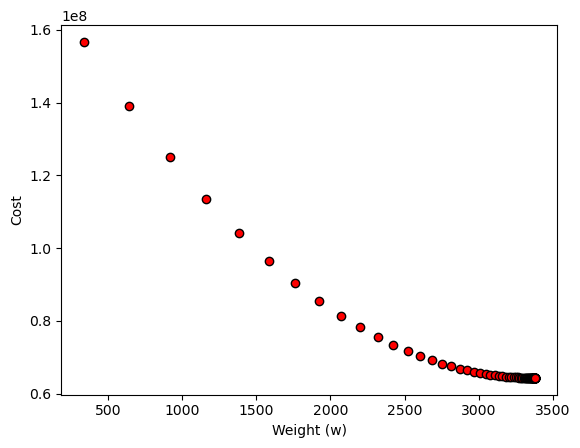

In [16]:
# Plot, cost vs weight

plt.scatter(w_list, costs, c='r', edgecolor='black')
plt.xlabel('Weight (w)')
plt.ylabel('Cost')
plt.show()

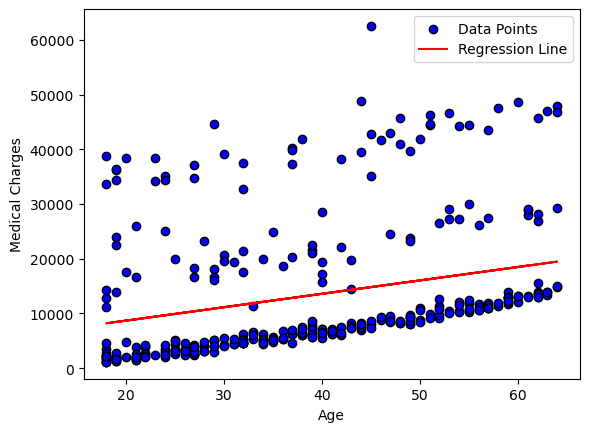

In [17]:
# Plot Linear Regression

plt.scatter(X_test, y_test, c='b', edgecolor='black', label='Data Points')
plt.plot(X_test, y_hat, label='Regression Line', c='r')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.legend()
plt.show()

## Using sklearn

In [18]:
# import required modules

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

### LinearRegression model (Normal Equation for cost function optimization)

In [19]:
# Fit the Linear Regression model

model = LinearRegression().fit(X_train_scaled, y_train)
model

LinearRegression()

In [20]:
# Model results

w = model.coef_
b = model.intercept_

print(f'Weight (w) = {w}')
print(f'Bais (b) = {b}')

Weight (w) = [3379.26999477]
Bais (b) = 13164.962611149


In [21]:
# Prediction

y_hat1 = model.predict(X_test_scaled)
print(f'Predicted values = {y_hat1[:10]}')

Predicted values = [ 8443.04292073 18497.80061431 11140.66083852 12857.3267862
 18252.56262179 18988.27659937 12857.3267862  13102.56477873
 18007.32462926 10650.18485347]


In [22]:
# MSE Loss

cost = mean_squared_error(y_test, y_hat1)
print(f'MSE Loss of Training: {round(cost, 2)}')

MSE Loss of Training: 147563580.01


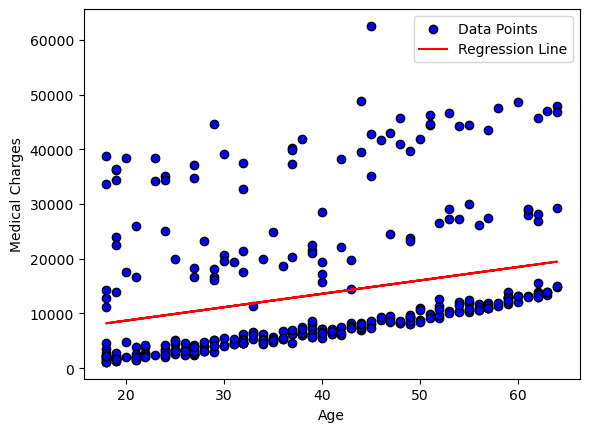

In [23]:
# Plot Linear Regression for test data

plt.scatter(X_test, y_test, c='b', edgecolor='black', label='Data Points')
plt.plot(X_test, y_hat1, label='Regression Line', c='r')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.legend()
plt.show()

### SGDRegressor model (Gradient Descent for cost function optimization)

In [24]:
y_train.shape

(1000,)

In [25]:
X_train_scaled.shape

(1000, 1)

In [26]:
# Fit the Linear Regression model

model = SGDRegressor(alpha=0.1, max_iter=100, random_state=25).fit(X_train_scaled, y_train)
model

SGDRegressor(alpha=0.1, max_iter=100, random_state=25)

In [27]:
# Model results

w = model.coef_
b = model.intercept_

print(f'Weight (w) = {w}')
print(f'Bais (b) = {b}')

Weight (w) = [3107.35324532]
Bais (b) = [13109.28714669]


In [28]:
# Prediction

y_hat2 = model.predict(X_test_scaled)
print(f'Predicted values = {y_hat2[:10]}')

Predicted values = [ 8767.32201904 18013.01236    11247.87308613 12826.40558337
 17787.50771754 18464.02164493 12826.40558337 13051.91022583
 17562.00307508 10796.86380121]


In [29]:
# MSE Loss

cost = mean_squared_error(y_test, y_hat2)
print(f'MSE Loss of Training: {round(cost, 2)}')

MSE Loss of Training: 148236400.91


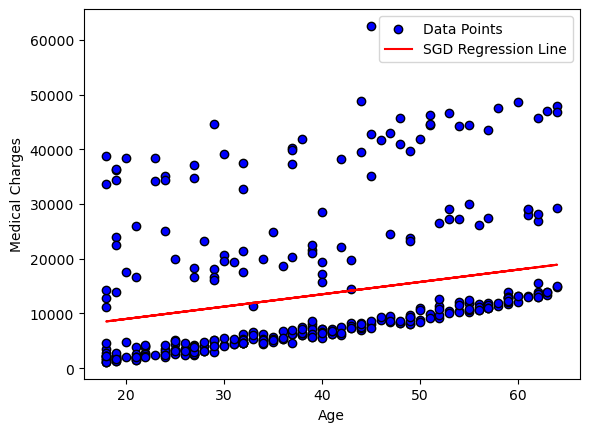

In [30]:
# Plot Linear Regression for test data

plt.scatter(X_test, y_test, c='b', edgecolor='black', label='Data Points')
plt.plot(X_test, y_hat2, label='SGD Regression Line', c='r')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.legend()
plt.show()

### Comparison

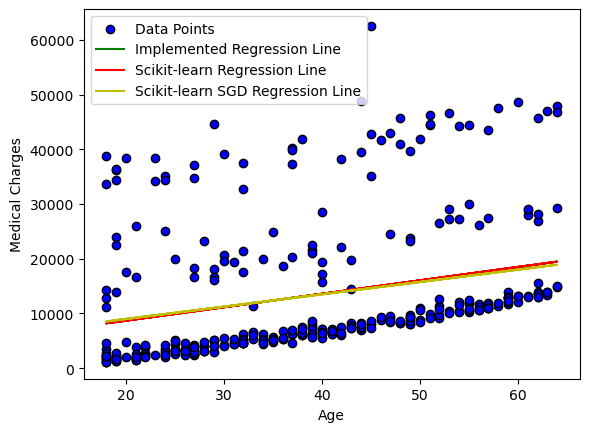

In [31]:
# Plot Regression lines

plt.scatter(X_test, y_test, c='b', edgecolor='black', label='Data Points')
plt.plot(X_test, y_hat, c='g', label='Implemented Regression Line')
plt.plot(X_test, y_hat1, c='r', label='Scikit-learn Regression Line')
plt.plot(X_test, y_hat2, c='y', label='Scikit-learn SGD Regression Line')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.legend()
plt.show()

## Linear Regression using Multiple features

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

**Prepare data**

In [33]:
# input feature
input_cols = train_df.columns[:-1].tolist()

# target feature 
target_col = 'charges'

# train and test dataset inputs and target
train_inputs, y_train = train_df[input_cols].copy(), train_df[target_col].copy()
test_inputs, y_test = test_df[input_cols].copy(), test_df[target_col].copy()

In [34]:
# Numeric and Categorical columns

numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

print(f'Numeric Columns : {numeric_cols}')
print(f'Categorical Columns : {categorical_cols}')

Numeric Columns : ['age', 'bmi', 'children']
Categorical Columns : ['sex', 'smoker', 'region']


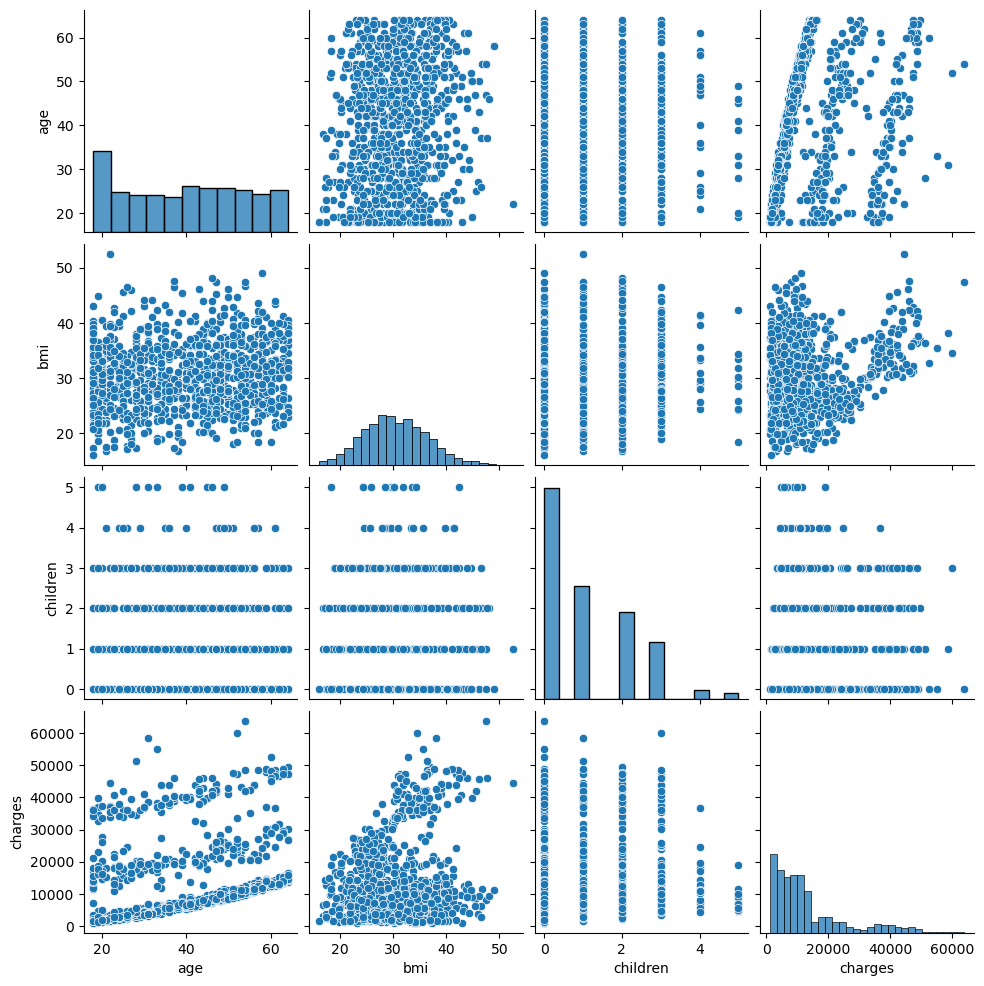

In [35]:
# Explore numeric columns and target 

sns.pairplot(train_df, vars=numeric_cols + ['charges'])
plt.show()

In [36]:
# Scale numeric features

scaler = StandardScaler().fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [37]:
# Encode categorical features

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [38]:
# Training and Test inputs

X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# train data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

# test data
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1000, 11)
y_train shape: (1000,)
X_test shape: (338, 11)
y_test shape: (338,)


### Using Model from scratch

In [39]:
# convert inputs and targets to array

X_train_a, y_train_a = X_train.values, y_train.values
X_test_a, y_test_a = X_test.values, y_test.values

# train data
print(f'X_train : {X_train_a[:2, :]}')
print(f'y_train shape: {y_train_a[:2]}')

# test data
print(f'X_test shape: {X_test_a[:2, :]}')
print(f'y_test shape: {y_test_a[:2]}')

X_train : [[-1.45403099  0.81969744 -0.90106518  0.          1.          1.
   0.          0.          1.          0.          0.        ]
 [ 1.23743852  0.16360009 -0.90106518  0.          1.          1.
   0.          0.          1.          0.          0.        ]]
y_train shape: [ 1646.4297 11353.2276]
X_test shape: [[-1.45403099 -0.97758176 -0.07135507  0.          1.          1.
   0.          0.          0.          0.          1.        ]
 [ 1.44992296  0.89780427 -0.90106518  1.          0.          1.
   0.          1.          0.          0.          0.        ]]
y_test shape: [ 1837.237   13228.84695]


In [40]:
# Linear Regression function, Multiple Features

def linear_regression(X, y, alpha, num_iters):
    """
    Computes the gradient for linear regression 
    Args:
      X (nd array (m,j)): Data, m examples, j features 
      y (1-d array (m,1)): target values
      alpha(scalar): learning rate
      num_iters (int): Number of iterations for gradient descent
    Returns:
      W (nd array (j,)): The weight for the input feature
      b (scalar): Bias term    
      costs (list): History of cost values during iterations
      W_history: History of weight values
     """

    # Number of training examples
    m = X.shape[0]
    
    # Number of features
    j = X.shape[1]
    
    # Initial parameters
    W = np.zeros(j)    
    b = 0

    # List to store weight w
    W_history = []

    # List to store Cost
    costs = []
    
    for i in range(num_iters):
       
        # Linear Model
        f_wb = np.dot(X, W) + b
        
        # Cost
        cost = np.sum((f_wb - y) ** 2) / (2 * m)
        costs.append(cost)
        
        # Gradient
        dj_dw = np.dot(X.T, (f_wb - y)) / m
        dj_db = np.sum(f_wb - y) / m

        # Update Parameters
        W = W - alpha * dj_dw.flatten()   # flatten dj_dw to match the shape of W
        W_history.append(W.copy())   # store a copy of w for analysis
        
        b = b - alpha * dj_db

    return W, b, costs, W_history

In [41]:
# Set learning rate and no. of iterations

alpha = 0.1
num_iters = 100

In [42]:
# Apply the model

W, b, costs, W_history = linear_regression(X_train_a, y_train_a, alpha, num_iters)

In [43]:
# Model results

print(f'Final Weight (w) = {np.round(W, 5)}')
print(f'Final Bias (b) = {round(b, 5)}')

for i in range(len(costs)):
    print(f'Iteration {i+1}: Weights(w) = {np.round(W_history[i], 5)}, Cost of Training = {round(costs[i], 5)}')


Final Weight (w) = [ 3598.74422  2122.59143   507.90977  4288.75202  4490.08075 -6597.26007
 15376.09284  2775.0002   2367.61086  1749.08991  1887.1318 ]
Final Bias (b) = 8778.83277
Iteration 1: Weights(w) = [337.927   250.2194   98.97453 628.91005 687.58621 690.4663  626.02996
 328.17802 288.02613 394.11916 306.17296], Cost of Training = 156680869.36025
Iteration 2: Weights(w) = [ 639.02689  470.3856   185.13991 1107.58644 1227.03512 1140.27465
 1194.34691  584.7909   508.69457  701.2692   539.8669 ], Cost of Training = 120276465.92608
Iteration 3: Weights(w) = [ 907.75347  664.07597  259.93593 1473.34317 1653.74162 1410.6843
 1716.40048  787.35459  678.82333  942.04449  718.86237], Cost of Training = 97987413.33984
Iteration 4: Weights(w) = [1147.95994  834.43893  324.66626 1754.27575 1994.44429 1547.82134
 2200.8987   949.05776  811.055   1132.03735  856.56993], Cost of Training = 83869230.04392
Iteration 5: Weights(w) = [1362.99177  984.24707  380.5053  1971.53248 2269.35279 1586.4

In [44]:
# Prediction function

def predict_yhat(X, W, b):
    """
    Compute the Prediction  based on W and b
    Args:
     X (ndarray (m,j)): Data, m examples, j features
     W (1-darray (j,)): The weights for the input features
     b (scalar): Bias term   
    Returns:
     y_hat(1-darray (m,)): Predicted values
     """

    # Number of training examples
    m = X.shape[0]

    # Predicted values
    y_hat = np.dot(X, W) + b

    return y_hat

In [45]:
# Prediction

y_hat = predict_yhat(X_test_a, W, b)
print(f'Predicted values = {y_hat[:10]}')

Predicted values = [ 1214.85100927 15911.23863604  6539.76640646  7900.23584259
 13002.98243538 16216.83881185  8048.94227041 11291.08846276
 38343.15968752  4253.98676082]


In [46]:
weights = W.tolist() + [b]
weight_df = pd.DataFrame({'Features': X_train.columns.tolist() + ['Intercept (b)'],
            'Weights (Scratch)': weights})
weight_df

,Features,Weights (Scratch)
0,age,3598.744225
1,bmi,2122.591432
2,children,507.909769
3,sex_female,4288.752022
4,sex_male,4490.080749
5,smoker_no,-6597.260073
6,smoker_yes,15376.092843
7,region_northeast,2775.000202
8,region_northwest,2367.610859
9,region_southeast,1749.089910


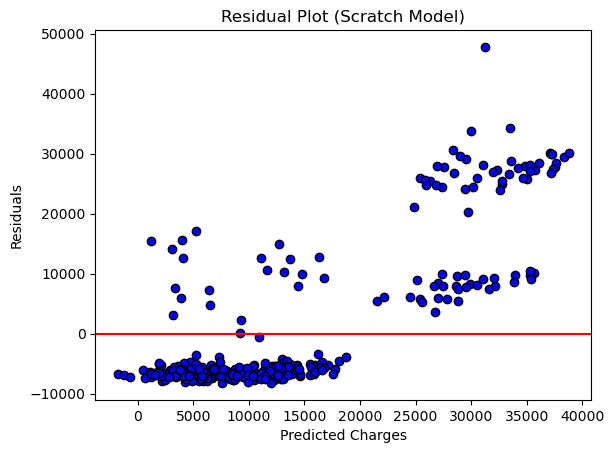

In [47]:
# Residuals (difference between actual and predicted)
residuals = y_test - y_hat1

# Plot residuals

plt.scatter(y_hat, residuals, c='b', edgecolor='black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot (Scratch Model)')
plt.show()

### LinearRegression model (Normal Equation for cost function optimization)

In [48]:
# Fit the Linear Regression model

model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

In [49]:
# Model results

W = model.coef_
b = model.intercept_

weights = W.tolist() + [b]
weight_df = pd.DataFrame({'Features': X_train.columns.tolist() + ['Intercept (b)'],
            'Weights (LinearRegression)': weights})
weight_df

,Features,Weights (LinearRegression)
0,age,3619.966722
1,bmi,2193.046678
2,children,488.203611
3,sex_female,3.391636
4,sex_male,-3.391636
5,smoker_no,-11756.127296
6,smoker_yes,11756.127296
7,region_northeast,651.595891
8,region_northwest,368.402557
9,region_southeast,-784.622727


In [50]:
# Prediction

y_hat1 = model.predict(X_test)
print(f'Predicted values = {y_hat1[:10]}')

Predicted values = [  858.20996443 15971.92313735  6498.13765257  7717.28010214
 12506.81973569 16320.45499761  7571.74350913 11106.34794254
 39834.12884769  4257.75171011]


In [51]:
# MSE Loss

cost = mean_squared_error(y_test, y_hat1)
print(f'MSE Cost of Training: {round(cost, 2)}')

MSE Cost of Training: 37808963.54


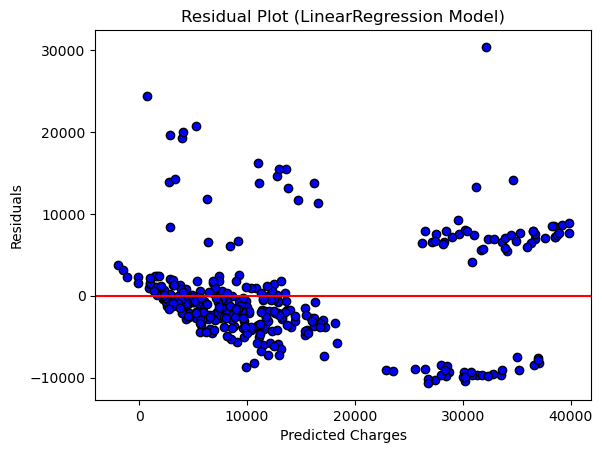

In [52]:
# Residuals (difference between actual and predicted)
residuals = y_test - y_hat1

# Plot residuals
plt.scatter(y_hat1, residuals, c='b', edgecolor='black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot (LinearRegression Model)')
plt.show()

### SGDRegressor model (Gradient Descent for cost function optimization)

In [53]:
# Fit the Linear Regression model

model = SGDRegressor(alpha=0.1, max_iter=100, random_state=25).fit(X_train, y_train)
model

SGDRegressor(alpha=0.1, max_iter=100, random_state=25)

In [54]:
# Model results

W = model.coef_
b = model.intercept_

weights = W.tolist() + b.tolist()
weight_df = pd.DataFrame({'Features': X_train.columns.tolist() + ['Intercept (b)'],
            'Weights (SGDRegressor)': weights})
weight_df

,Features,Weights (SGDRegressor)
0,age,3172.353634
1,bmi,1910.058070
2,children,562.884194
3,sex_female,924.089633
4,sex_male,1292.216796
5,smoker_no,-7677.827261
6,smoker_yes,9894.133690
7,region_northeast,987.239706
8,region_northwest,654.264602
9,region_southeast,256.192898


In [55]:
# Prediction

y_hat2 = model.predict(X_test)
print(f'Predicted values = {y_hat2[:10]}')

Predicted values = [ 3010.9067378  15638.84443571  7564.22418988  8933.775595
 13482.03497693 16201.53841077  9039.15209394 11858.99486083
 34029.01216373  5419.96068146]


In [56]:
# MSE Loss

cost = mean_squared_error(y_test, y_hat2)
print(f'MSE Cost of Training: {round(cost, 2)}')

MSE Cost of Training: 46601185.67


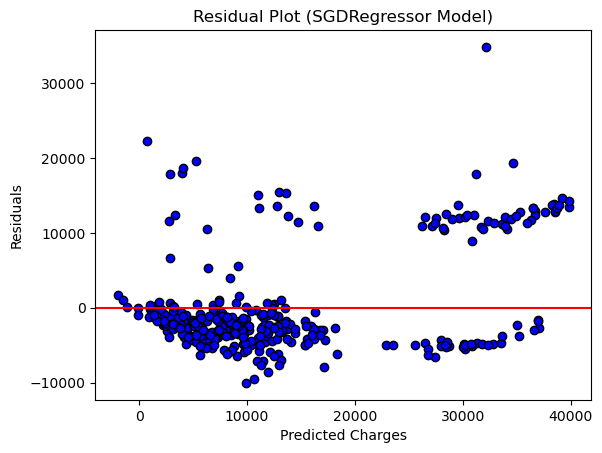

In [57]:
# Residuals (difference between actual and predicted)
residuals = y_test - y_hat2

# Plot residuals
plt.scatter(y_hat1, residuals, c='b', edgecolor='black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot (SGDRegressor Model)')
plt.show()

### Comparison

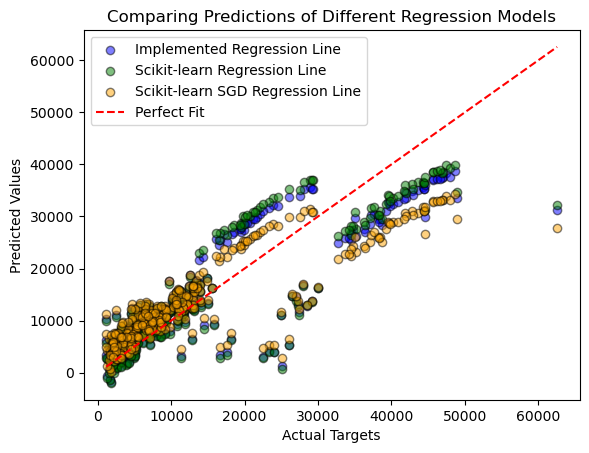

In [58]:
# Plot Actual test targets vs test predictions for different models

plt.scatter(y_test, y_hat, label='Implemented Regression Line', color='blue', alpha=0.5, edgecolor='black')
plt.scatter(y_test, y_hat1, label='Scikit-learn Regression Line', color='green', alpha=0.5, edgecolor='black')
plt.scatter(y_test, y_hat2, label='Scikit-learn SGD Regression Line', color='orange', alpha=0.5, edgecolor='black')

# Plot the Perfect Fit Line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Targets')
plt.ylabel('Predicted Values')
plt.title('Comparing Predictions of Different Regression Models')
plt.legend()
plt.show()